In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os
os.chdir("..")

In [3]:
from scripts.run_combined_experiments import LABELED_BUDGETS, UNLABELED_BUDGETS
from distribution import create_random_distribution
from utils import cross_entropy

In [4]:
def results(d, agg, ax, weight_ax, start_idx, legend=False):
    distribution = create_random_distribution(10, .55, .75, d, epsilon=.1, seed=123)
    H = distribution.expectation(lambda L, Y: cross_entropy(distribution.positive_probs(L), Y))
    
    results_path = Path("results") / f"combined_results_d={d}_agg={agg}"
    green_losses = np.load(results_path / "green_losses.npy") - H
    green_weights = np.load(results_path / "green_weights.npy")
    optimal_losses = np.load(results_path / "optimal_losses.npy") - H
    optimal_weights = np.load(results_path / "optimal_weights.npy")
    labeled_losses = np.load(results_path / "labeled_losses.npy") - H
    unlabeled_losses = np.load(results_path / "unlabeled_losses.npy") - H
    
    ax.plot(LABELED_BUDGETS[start_idx:], labeled_losses[start_idx:], label="Labeled Only")
    ax.plot(LABELED_BUDGETS[start_idx:], [unlabeled_losses[0]] * len(LABELED_BUDGETS[start_idx:]), label=rf"Unabeled Only ($n_U={UNLABELED_BUDGETS[0]}$)")
    ax.plot(LABELED_BUDGETS[start_idx:], green_losses[start_idx:, 0], label="Green (2005)")
    ax.plot(LABELED_BUDGETS[start_idx:], optimal_losses[start_idx:, 0], label="Optimal Combination")
    
    if weight_ax is not None:
        weight_ax.plot(LABELED_BUDGETS[start_idx:], green_weights[start_idx:, 0], label="Green (2005)", color="tab:green")
        weight_ax.plot(LABELED_BUDGETS[start_idx:], optimal_weights[start_idx:, 0], label="Optimal Combination", color="tab:red")
    
    ax.set(xlabel=r"$n_L$", ylabel=r"$R^{\mathrm{excess}}$")
    if weight_ax is not None:
        weight_ax.set(xlabel=r"$n_L$", ylabel="Weight")
        weight_ax.set_ylim([0, 1])
    if legend:
        ax.legend()
        if weight_ax is not None:
            weight_ax.legend()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


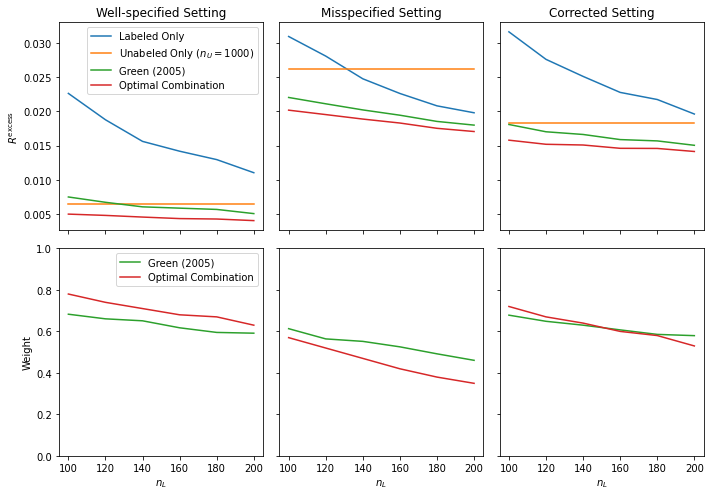

In [5]:
fig, axs = plt.subplots(2, 3, figsize=(10, 7), sharey="row")

results(0, "mean", axs[0, 0], axs[1, 0], 4, legend=True)
axs[0, 0].set_title("Well-specified Setting")
results(5, "mean", axs[0, 1], axs[1, 1], 4)
axs[0, 1].set_title("Misspecified Setting")
results(5, "median", axs[0, 2], axs[1, 2], 4)
axs[0, 2].set_title("Corrected Setting")

for ax in axs.flat:
    ax.label_outer()

fig.tight_layout()
plt.savefig("figures/combined.eps", format="eps")
plt.show()